# Lian Amin Abdallah 


##### About Features
##### All attributes are numeric variables and they are listed bellow:

##### squareMeters 
##### numberOfRooms 
##### hasYard 
##### hasPool 
##### floors : number of floors 
##### cityCode : zip code 
##### cityPartRange : the higher the range, the more exclusive the neighbourhood is 
##### numPrevOwners : number of prevoious owners 
##### made : year 
##### isNewBuilt
##### hasStormProtector
##### basement : basement square meters
##### attic : attic square meteres
##### garage : garage size
##### hasStorageRoom
##### hasGuestRoom : number of guest rooms
##### price : price of a house
##### category : Luxury or Basic
#### Our task is to predict the 'category'

##### a dataset that contains 10,000 rows and 18 columns and it is classification.

##  libraries Importing 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve
import matplotlib.patches as patches 

## Get the Data


In [2]:
#reading the dataset and save it in dataFrame called "Traffic"

PHC = pd.read_csv(r"C:\Users\user\Downloads\ParisHousingClass.csv")
PHC

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [3]:
# get the top five rows by .head()
PHC.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [4]:
#summary of categorical attributes using the describe() method
PHC.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [5]:
# get quick discription about the data by .info()

PHC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
#using .describe() with categorical attribues
PHC['category'].describe()

count     10000
unique        2
top       Basic
freq       7470
Name: category, dtype: object

### Data Visualization

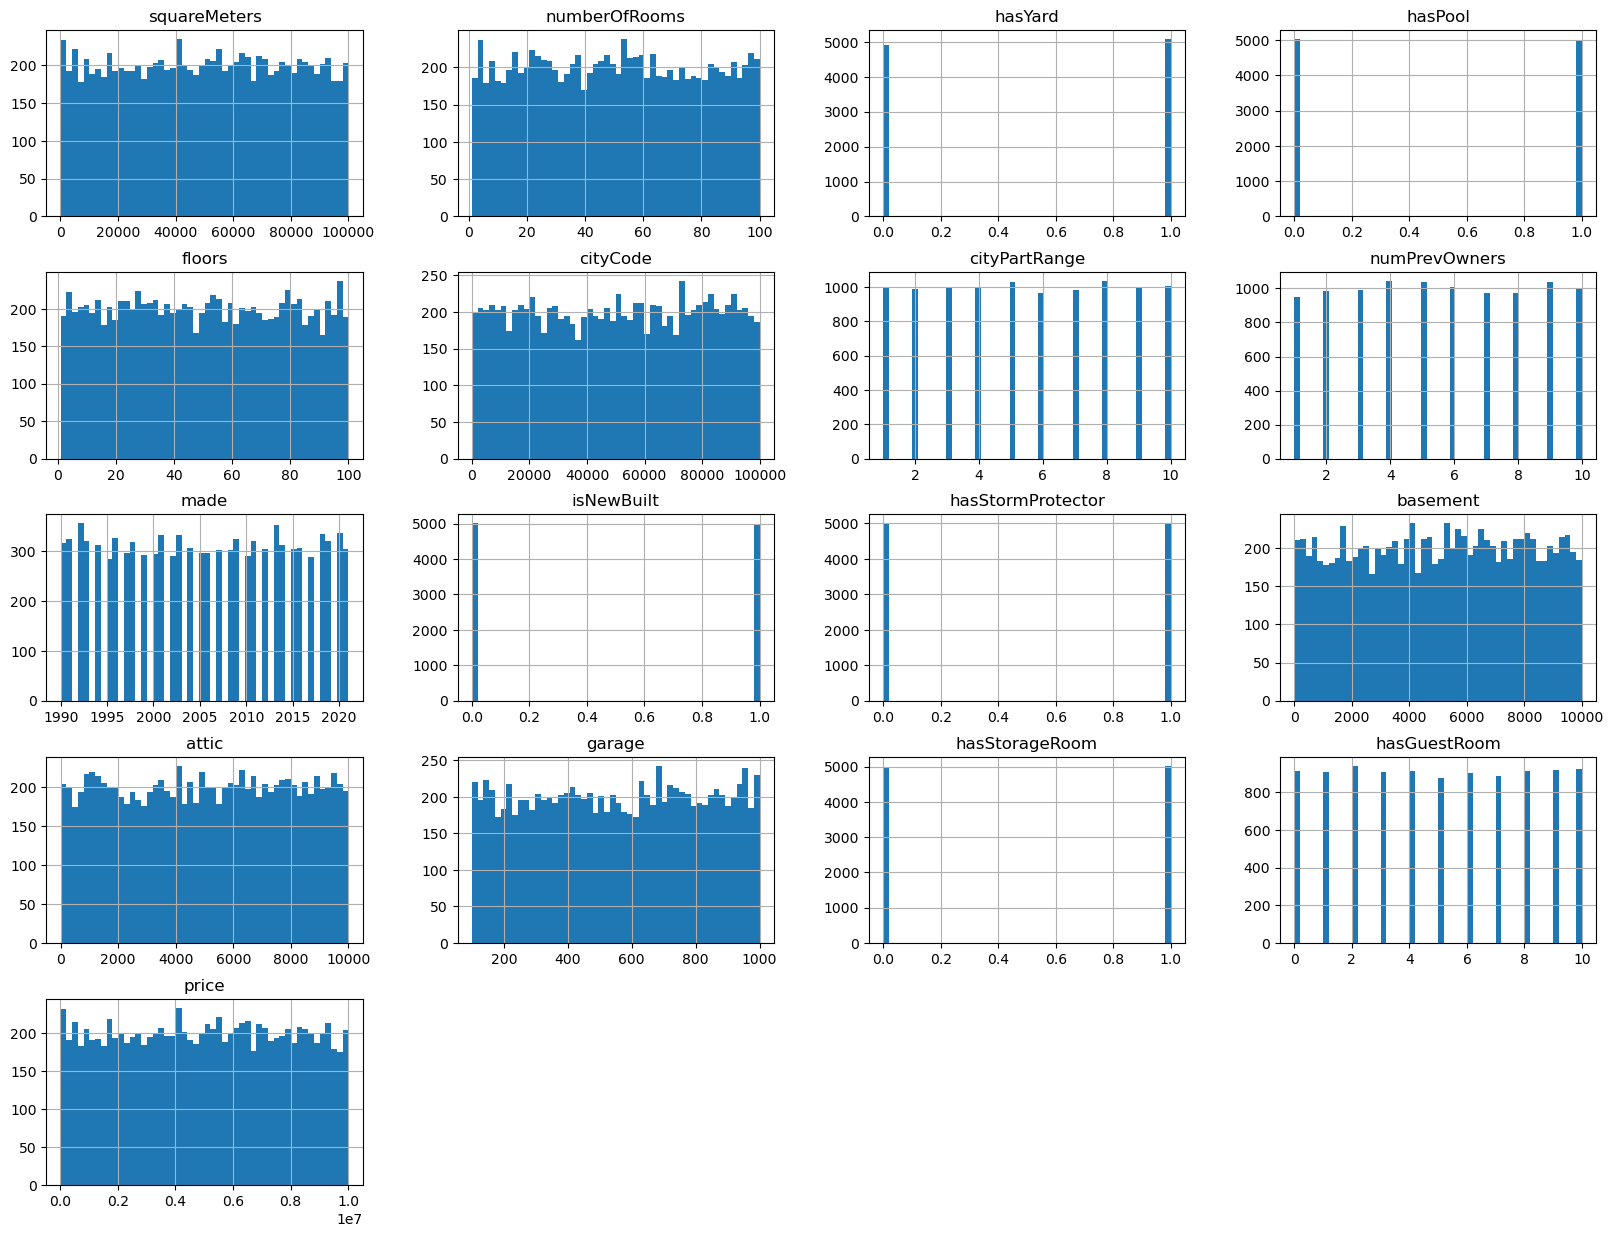

In [7]:
PHC.hist(bins=50, figsize=(20,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

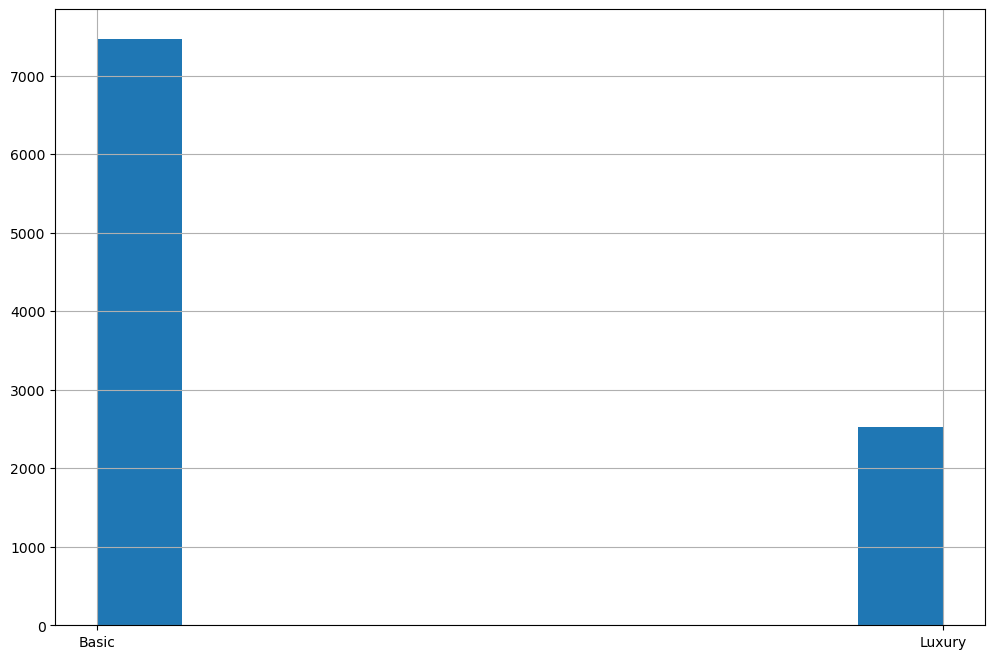

In [8]:
#This displays a comparison between the two categories in the Category column:
PHC['category'].hist(figsize = (12,8))
plt.show

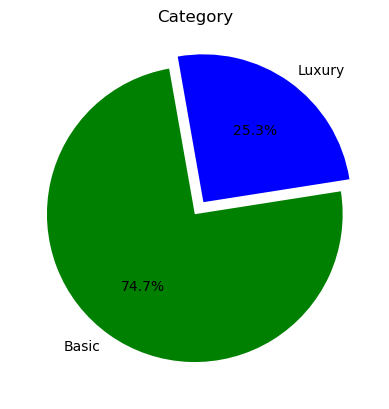

In [9]:
#pie plot that shows the percentage of the two classes(Basic,Luxury) in the "Category" column
x = PHC['category'].value_counts()
values = [x.Basic,x.Luxury]
Ans= ['Basic','Luxury']
plt.title('Category')
colors = ['green', 'blue']
plt.pie(values,labels = Ans,autopct = '%1.1f%%',startangle=100,explode =(0,.1), colors=colors) 
plt.show()

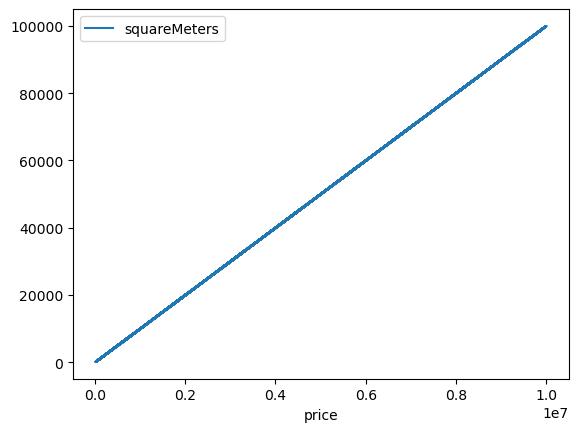

In [10]:
#the relationship between squareMeters and price columns:
PHC.plot(x="price", y="squareMeters")
plt.show()

#The larger the square meter, the higher the price

## Looking for Correlations

In [11]:
corr_matrix = PHC.corr()

In [12]:
# see the correlation between price and all columns
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

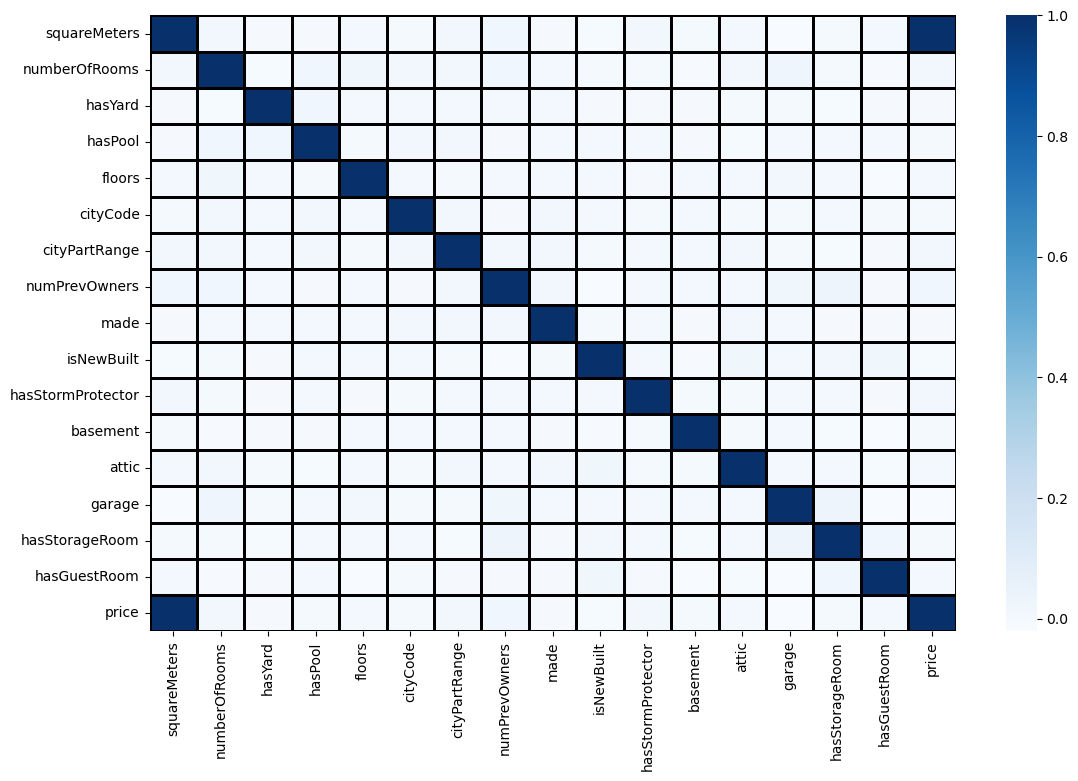

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
Data = PHC.select_dtypes(np.number)
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix,cmap='Blues', linecolor='black', linewidths= 2 )
plt.show()
#The provided matrix illustrates the correlation among features, with color intensity reflecting the correlation value.
#A Blue color indicates a strong  correlation between the two features, whereas a bright color suggests a negative correlation.


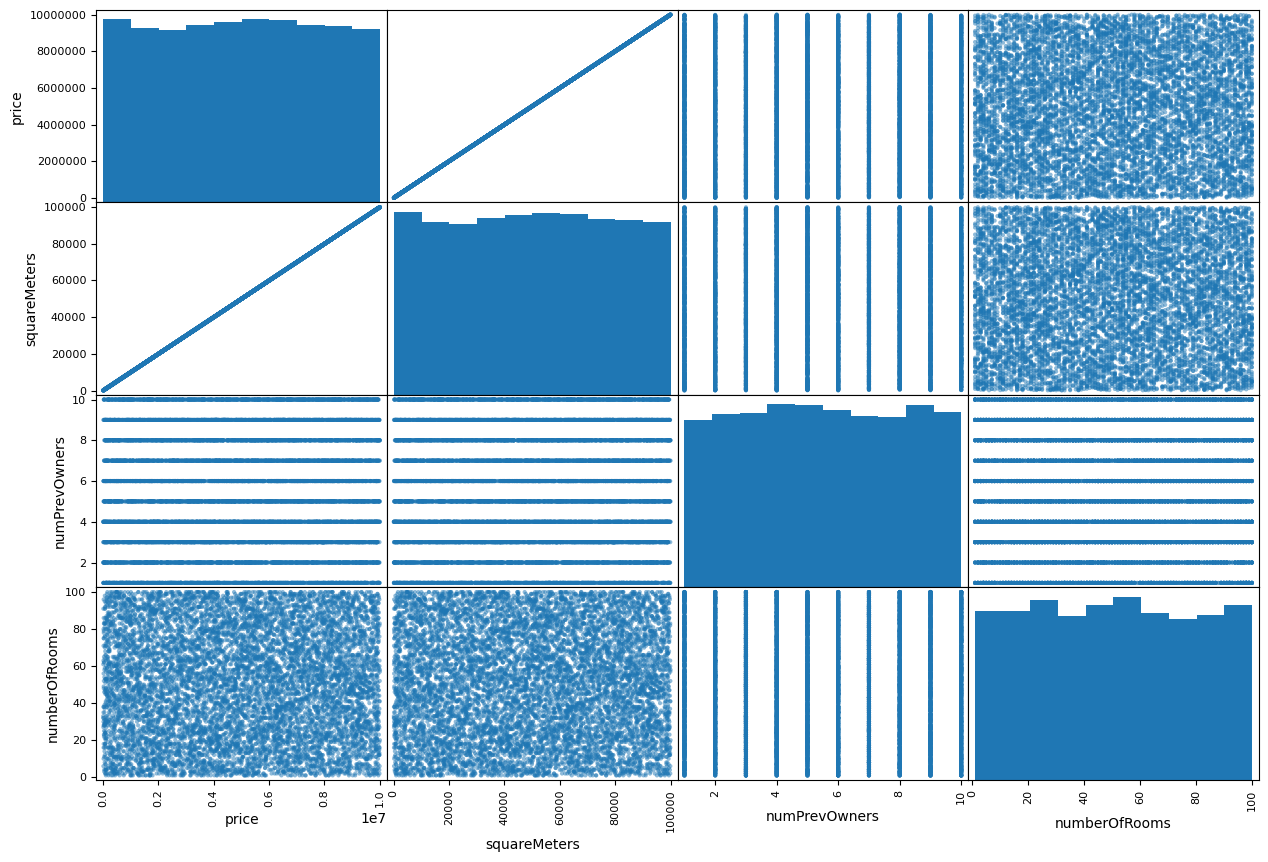

In [14]:
attributes = ["price", "squareMeters", "numPrevOwners","numberOfRooms"]
scatter_matrix(PHC[attributes], figsize=(15, 10))
plt.show()

#  Data Cleaning 

checking if there are missing values

In [15]:
PHC.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

## Create a Test Set and Trian Set


In [16]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [17]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(PHC, 0.2)
len(train_set)

8000

In [19]:
len(test_set)

2000

In [20]:
# make the data stratification by shuffle and split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(PHC, test_size=0.2, random_state=42)
test_set.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
6252,79553,7,1,0,61,35059,8,2,1996,1,1,3372,7603,896,1,1,7964369.6,Luxury
4684,37047,79,1,1,87,57780,3,3,2019,1,0,5658,8216,160,0,5,3713548.9,Luxury
1731,85476,36,1,0,44,83386,9,7,1992,0,1,6698,6043,692,1,7,8553019.2,Basic
4742,64209,30,1,1,55,53245,5,5,1992,1,0,9761,6148,525,1,0,6428666.2,Luxury
4521,64550,89,1,1,68,4708,7,2,2019,0,0,1945,8269,495,0,10,6465184.9,Basic


We Handle Missing Data, Dealing with Categorical Data, Combining Data and Scaling Data.

In [21]:
PHC['totalNumOfRooms'] = PHC['numberOfRooms'] 
+PHC['hasGuestRoom'] 
PHC.drop(['hasGuestRoom','numberOfRooms'],axis = 1,inplace = True)

In [22]:
from sklearn.compose import make_column_selector, make_column_transformer

num_attribs = PHC.select_dtypes(np.number)
cat_attribs = [['category']]
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
cat_pipeline = make_pipeline( SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([("cat", cat_pipeline, make_column_selector(dtype_include=object)),("num", num_pipeline, make_column_selector(dtype_include=np.number))])

PHC_prep = preprocessing.fit_transform(PHC)
##converting it to DataFrame
PHC_D = pd.DataFrame(PHC_prep,columns =preprocessing.get_feature_names_out() )

In [23]:
PHC_D.shape

(10000, 18)

In [24]:
preprocessing.get_feature_names_out()

array(['cat__category_Basic', 'cat__category_Luxury', 'num__squareMeters',
       'num__hasYard', 'num__hasPool', 'num__floors', 'num__cityCode',
       'num__cityPartRange', 'num__numPrevOwners', 'num__made',
       'num__isNewBuilt', 'num__hasStormProtector', 'num__basement',
       'num__attic', 'num__garage', 'num__hasStorageRoom', 'num__price',
       'num__totalNumOfRooms'], dtype=object)

In [25]:
corr_matrix1 = PHC_D.select_dtypes(np.number).corr()
corr_matrix1[["cat__category_Basic", "cat__category_Luxury"]].sort_values(by=["cat__category_Basic", "cat__category_Luxury"], ascending=False)


,cat__category_Basic,cat__category_Luxury
cat__category_Basic,1.000000,-1.000000
num__basement,0.021868,-0.021868
num__squareMeters,0.017982,-0.017982
num__price,0.017663,-0.017663
num__hasStormProtector,0.011385,-0.011385
num__totalNumOfRooms,0.010871,-0.010871
num__cityPartRange,0.009496,-0.009496
num__numPrevOwners,0.007320,-0.007320
num__garage,0.005081,-0.005081
num__attic,0.003978,-0.003978


In [26]:
#split into three partS train set, test set and validation set:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=42)
for train_index, test_index in split.split(PHC_D, PHC_D[["cat__category_Basic", "cat__category_Luxury"]]):
    strat_train_set1 = PHC_D.iloc[train_index]
    strat_test_set = PHC_D.iloc[test_index]
print("train set size = "+str(len(strat_train_set1)))
print("test set size = "+str(len(strat_test_set)))

train set size = 9000
test set size = 1000


In [27]:
split = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=42)
for train_index, test_index in split.split(strat_train_set1, strat_train_set1[["cat__category_Basic", "cat__category_Luxury"]]):
    strat_train_set = strat_train_set1.iloc[train_index]
    strat_val_set = strat_train_set1.iloc[test_index]
print("train set size = "+str(len(strat_train_set)))
print("validation set size = "+str(len(strat_val_set)))

train set size = 8100
validation set size = 900


#### To ensure a nearly equal distribution of data among the test, training, and validation sets

In [28]:
strat_train_set[["cat__category_Basic", "cat__category_Luxury"]].value_counts() / len(strat_train_set)

cat__category_Basic  cat__category_Luxury
1.0                  0.0                     0.747037
0.0                  1.0                     0.252963
dtype: float64

In [29]:
strat_test_set[["cat__category_Basic", "cat__category_Luxury"]].value_counts() / len(strat_test_set)

cat__category_Basic  cat__category_Luxury
1.0                  0.0                     0.747
0.0                  1.0                     0.253
dtype: float64

In [30]:
strat_val_set[["cat__category_Basic", "cat__category_Luxury"]].value_counts() / len(strat_val_set)

cat__category_Basic  cat__category_Luxury
1.0                  0.0                     0.746667
0.0                  1.0                     0.253333
dtype: float64

#### Seperate Labels 

In [31]:
Data_train = strat_train_set.drop(["cat__category_Basic", "cat__category_Luxury"],axis = 1)
Label_train = strat_train_set["cat__category_Basic"].copy()
Data_test = strat_test_set.drop(["cat__category_Basic", "cat__category_Luxury"],axis = 1)
Label_test = strat_test_set["cat__category_Basic"].copy()
Data_val = strat_val_set.drop(["cat__category_Basic", "cat__category_Luxury"],axis = 1)
Label_val = strat_val_set["cat__category_Basic"].copy()

In [32]:
!pip install imbalanced-learn


In [33]:
#we are going to use the SMOTE( ) to balance it because the data imbalanced
#Explaining the functionality of SMOTE(): It enhances dataset balance by creating additional instances in a proportionate manner
#This process involves generating new instances based on the existing minority cases, where, in this particular dataset,
#the minority pertains to the Luxury category.

from imblearn.over_sampling import SMOTE
from collections import Counter

before0 = Counter(Label_test)
before1 = Counter(Label_train)
before2 = Counter(Label_val)
print("Before: \nTest "+str(before0)+" \nTrain  "+str(before1)+" \nValidation  "+str(before2))

Before: 
Test Counter({1.0: 747, 0.0: 253}) 
Train  Counter({1.0: 6051, 0.0: 2049}) 
Validation  Counter({1.0: 672, 0.0: 228})


In [34]:
sm = SMOTE(random_state = 2)
Data_train_b, Label_train_b = sm.fit_resample(Data_train, Label_train)
Data_test_b, Label_test_b = sm.fit_resample(Data_test, Label_test)
Data_val_b, Label_val_b = sm.fit_resample(Data_val, Label_val)

In [35]:
#the percentage of Bsic to Luxury after balancing
after0 = Counter(Label_test_b)
after1 = Counter(Label_train_b)
after2 = Counter(Label_val_b)
print("After: \nTest "+str(after0)+" \nTrain "+str(after1)+" \nValidation "+str(after2))

After: 
Test Counter({0.0: 747, 1.0: 747}) 
Train Counter({1.0: 6051, 0.0: 6051}) 
Validation Counter({1.0: 672, 0.0: 672})


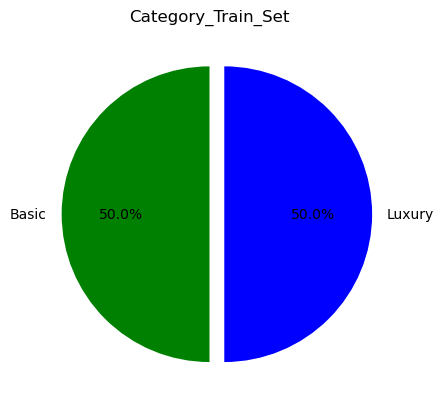

In [36]:
x_1 = Label_train_b.value_counts()
values_1 = [x_1[1.0],x_1[0]]
Ans_1= ['Basic','Luxury']
plt.title('Category_Train_Set')
colors = ['green', 'blue']
plt.pie(values_1,labels = Ans_1,autopct = '%1.1f%%',startangle=90,explode =(0,.1), colors=colors) 
plt.show()

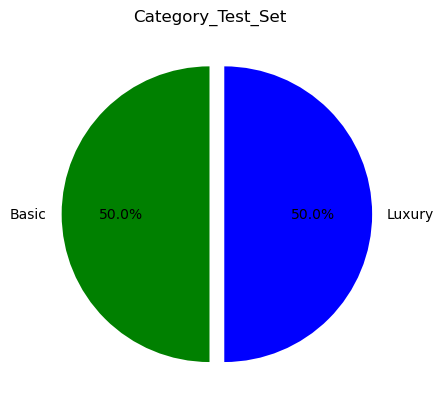

In [37]:
x_2= Label_test_b.value_counts()
values1 = [x_2[1.0],x_2[0]]
Ans_1= ['Basic','Luxury']
plt.title('Category_Test_Set')
colors = ['green', 'blue']
plt.pie(values_1,labels = Ans_1,autopct = '%1.1f%%',startangle=90,explode =(0,.1), colors=colors) 
plt.show()

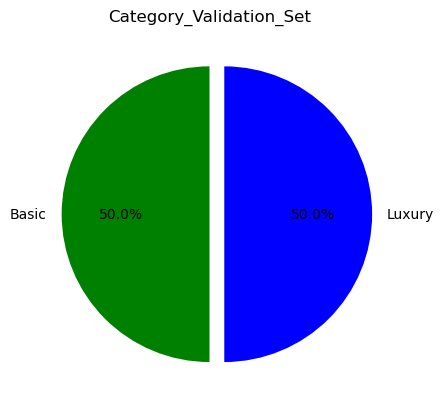

In [38]:
x_3= Label_val_b.value_counts()
values1 = [x_3[1.0],x_3[0]]
Ans_1= ['Basic','Luxury']
plt.title('Category_Validation_Set')
colors = ['green', 'blue']
plt.pie(values_1,labels = Ans_1,autopct = '%1.1f%%',startangle=90,explode =(0,.1), colors=colors) 
plt.show()

# Classification

## in this part we did train the following models :
#### 1.Logistic regression
#### 2.LinearSVC model
#### 3.Decision Tree
#### 4.Random Forest Classifier
#### 5.K-Nearest Neighbor Classifier
#### 6.Binary classifier model

### Logisric regression


In [39]:
log_clf = LogisticRegression(random_state=42,penalty='l1',solver='liblinear')
LR = log_clf.fit(Data_train_b, Label_train_b)
score_train = cross_val_score(LR,Data_train_b, Label_train_b, cv=3,scoring='accuracy')
score_test = cross_val_score(LR,Data_test_b, Label_test_b, cv=3,scoring='accuracy')
print("Train Score "+ str(score_train))
print("Test Score "+ str(score_test))


Train Score [0.99776896 1.         0.99876054]
Test Score [0.99598394 0.99799197 0.99799197]


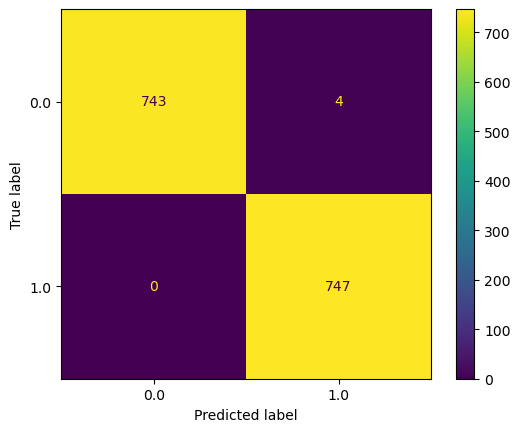

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay

y_pred=cross_val_predict(log_clf, Data_test_b, Label_test_b, cv=3)
ConfusionMatrixDisplay.from_predictions(Label_test_b,y_pred)
plt.show()

### SVC model

In [40]:
svm_clf = SVC(random_state=42)
svc = svm_clf.fit(Data_train_b, Label_train_b)
score_train1 = cross_val_score(svc,Data_train_b, Label_train_b, cv=3,scoring='accuracy')
score_test1 = cross_val_score(svc,Data_test_b, Label_test_b, cv=3,scoring='accuracy')
print("Train Score: "+ str(score_train1))
print("Test Score: "+ str(score_test1))

Train Score: [0.99776896 1.         0.99876054]
Test Score: [0.99799197 0.99799197 0.99799197]


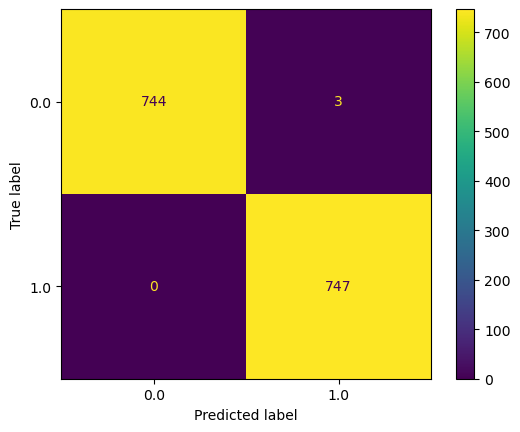

In [163]:
y_pred1=cross_val_predict(svm_clf, Data_test_b, Label_test_b, cv=3)
ConfusionMatrixDisplay.from_predictions(Label_test_b,y_pred1)
plt.show()

### Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

score_train2 = cross_val_score(tree_clf,Data_train_b, Label_train_b, cv=3,scoring='accuracy')
score_test2 = cross_val_score(tree_clf,Data_test_b, Label_test_b, cv=3,scoring='accuracy')
print("Train Score: "+ str(score_train1))
print("Test Score: "+ str(score_test1))

Train Score: [0.99776896 1.         0.99876054]
Test Score: [0.99799197 0.99799197 0.99799197]


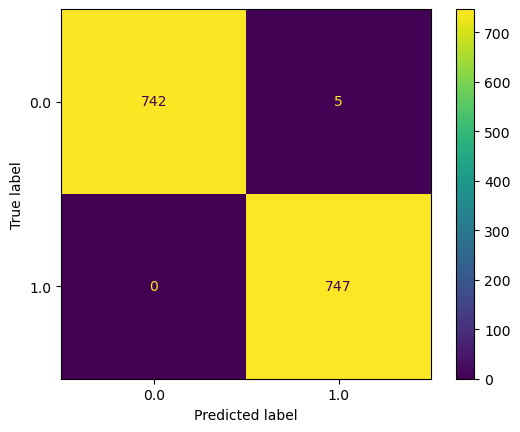

In [167]:
y_pred2=cross_val_predict(tree_clf, Data_test_b, Label_test_b, cv=3)
ConfusionMatrixDisplay.from_predictions(Label_test_b,y_pred2)
plt.show()

###  RandomForest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
score_train3 = cross_val_score(svc,Data_train_b, Label_train_b, cv=3,scoring='accuracy')
score_test3 = cross_val_score(svc,Data_test_b, Label_test_b, cv=3,scoring='accuracy')
print("Train Score: "+ str(score_train1))
print("Test Score: "+ str(score_test1))

Train Score: [0.99776896 1.         0.99876054]
Test Score: [0.99799197 0.99799197 0.99799197]


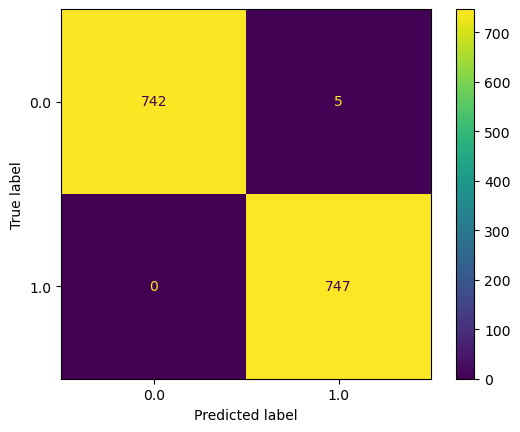

In [168]:
y_pred3=cross_val_predict(rnd_clf, Data_test_b, Label_test_b, cv=3)
ConfusionMatrixDisplay.from_predictions(Label_test_b,y_pred3)
plt.show()

### K-Nearest Neighbors (KNN) 

In [43]:
knn_clf = KNeighborsClassifier()
knn = knn_clf.fit(Data_train_b, Label_train_b)
score_train4 = cross_val_score(knn,Data_train_b, Label_train_b, cv=3,scoring='accuracy')
score_test4 = cross_val_score(knn,Data_test_b, Label_test_b, cv=3,scoring='accuracy')
print("Train Score: "+ str(score_train4))
print("Test Score: "+ str(score_test4))

Train Score: [0.98116014 0.98140803 0.979177  ]
Test Score: [0.92971888 0.93373494 0.90361446]


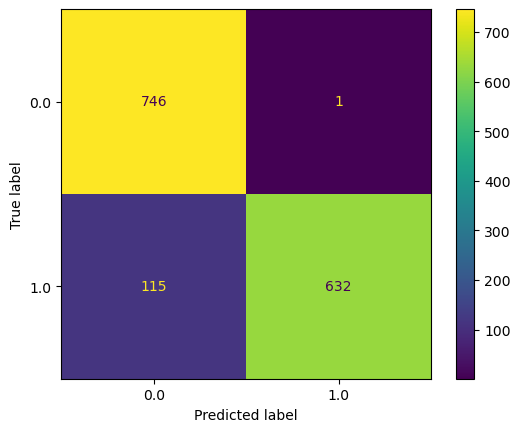

In [169]:
y_pred4=cross_val_predict(knn, Data_test_b, Label_test_b, cv=3)
ConfusionMatrixDisplay.from_predictions(Label_test_b,y_pred4)
plt.show()

###  Binary Classifier

In [44]:
Label_train_1 = (Label_train_b==1)
Label_test_1 = (Label_test_b==1)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(Data_train_b, Label_train_1)

SGDClassifier(random_state=42)

In [45]:
some_data = Data_train_b.iloc[0]
sgd_clf.predict([some_data])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [46]:
cross_val_score(sgd_clf,Data_train_b,Label_train_1, cv=3, scoring="accuracy")

array([0.99776896, 0.99950421, 0.99876054])

In [47]:
p = { 'logistic_regression' : {'model': LogisticRegression(random_state=42,penalty='l1',solver='liblinear'),
                                          'params': {'C': [1,5,10,3,7,2] , 'tol':[.0001,.001,.00001,0.01],
                                                     'max_iter':[50,100,200,800,1000]}},
      'RFC' :{'model': RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42),
                         'params' :  {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10]}},
     
                  'svm': {'model': svm.SVC(random_state=42),
                          'params' : {'C': [0, 1,10,20],'kernel': ['poly','linear'],'degree':[2,3]}},
     
                  'binary_classifier':{'model': SGDClassifier(random_state=42),
                          'params' : {'max_iter':[100,200,800,1000],'tol':[.0001,.001,.00001]}}, 

                  'knn' : {'model': KNeighborsClassifier(),
                           'params': {'n_neighbors': [1,10,20] }}
               }
table = []
for name, mp in p.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3)
    clf.fit(Data_train_b , Label_train_b)
    table.append({
        'model': name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
table = pd.DataFrame(table,columns=['model','best_score','best_params'])
table

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-packages\sklea

,model,best_score,best_params
0,logistic_regression,0.998926,"{'C': 5, 'max_iter': 50, 'tol': 0.0001}"
1,RFC,0.999008,"{'max_depth': None, 'n_estimators': 100}"
2,svm,0.998926,"{'C': 10, 'degree': 3, 'kernel': 'poly'}"
3,binary_classifier,0.998678,"{'max_iter': 100, 'tol': 0.001}"
4,knn,0.988597,{'n_neighbors': 1}


In [48]:
#the model with the highest accuracy
table.iloc[0]

model                              logistic_regression
best_score                                    0.998926
best_params    {'C': 5, 'max_iter': 50, 'tol': 0.0001}
Name: 0, dtype: object

In [51]:
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('svc',svm_clf),('knn',knn_clf)],voting = 'hard')
voting_clf.fit(Data_train_b, Label_train_b)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(penalty='l1', random_state=42,
                                                 solver='liblinear')),
                             ('svc', SVC(random_state=42)),
                             ('knn', KNeighborsClassifier())])

In [52]:
for clf in (log_clf,svm_clf,knn_clf,voting_clf):
    clf.fit(Data_train_b, Label_train_b)
    label_pred = clf.predict(Data_test_b)
    print(clf.__class__.__name__,accuracy_score(Label_test_b,label_pred))

LogisticRegression 0.9966532797858099
SVC 0.9966532797858099
KNeighborsClassifier 0.9859437751004017
VotingClassifier 0.9966532797858099


### the Hyper Parameters of the Best Model

In [74]:
params = { 'logistic_regression' : {'model': LogisticRegression(random_state=42,penalty='l1',solver='liblinear'),
                                          'params': {'C': [1,5,10,3,7,2] , 'tol':[.0001,.001,.00001,0.01],
                                                     'max_iter':[50,100,200,800,1000]}}}

items = params.items()
for name1, mp1 in items:
    gs = GridSearchCV(log_clf, mp1['params'],cv = 3)
gs.fit(Data_train_b,Label_train_b)
print("Model Name: "+name1)
print("Best Score: "+ str(gs.best_score_))
print("Best Parameters: "+ str(gs.best_params_))



Model Name: logistic_regression
Best Score: 0.9989257973888614
Best Parameters: {'C': 5, 'max_iter': 50, 'tol': 0.0001}


In [75]:
end_mod = gs.best_estimator_

In [76]:
#the best model on the test data and the accuracy of the model
pred1 = end_mod.predict(Data_test_b)
pred2 = end_mod.predict(Data_val_b)
print("Test set accuracy:"+str(accuracy_score(Label_test_b,pred1)))
print("Validation set accuracy:"+str(accuracy_score(Label_val_b,pred2)))

Test set accuracy:0.9966532797858099
Validation set accuracy:0.9985119047619048


### confusion matrix

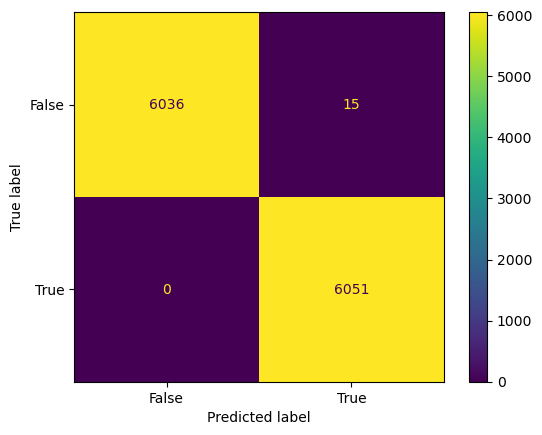

In [68]:
#confusion matrix to observe (TN,FP,FN,TP) and as we can see the performance is good on the diagonal  
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Label_train_1, label_scores_2)
plt.show()

#### Precision, Recall, F1 score

In [71]:
#calculate precesion, recall and f1 score
print(precision_score(Label_train_1,label_scores_2))
print(recall_score(Label_train_1,label_scores_2))
print(f1_score(Label_train_1,label_scores_2))

0.9975272007912958
1.0
0.9987620698192622


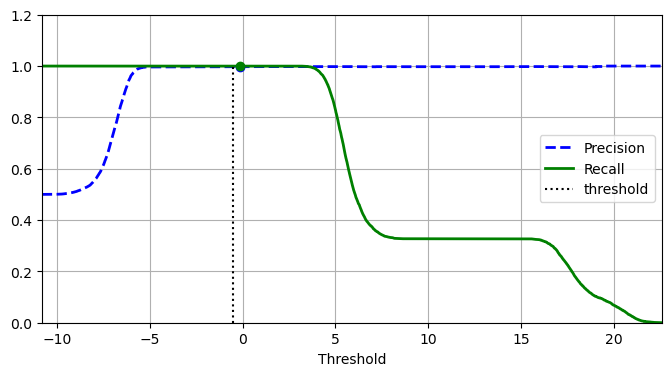

In [56]:
# assuming that threshold = -0.5:
threshold = -0.5
label_scores = cross_val_predict(log_clf, Data_train_b, Label_train_1, cv=3,method="decision_function")
label_scores_2 = (label_scores>threshold)
precisions, recalls, thresholds = precision_recall_curve(Label_train_1,label_scores)

##plotting precision vs recall relation 
threshold =-0.5
plt.figure(figsize=(8, 4)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.axis([thresholds.min(),thresholds.max(),0 , 1.2])

plt.show()

#### The ROC Curve

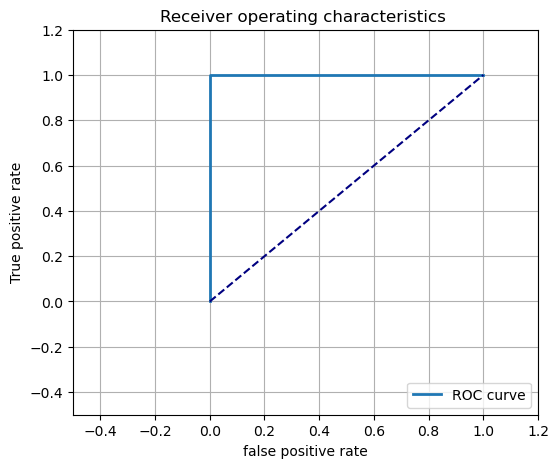

In [67]:
fpr,tpr,thresholds=roc_curve(Label_train_1,label_scores)
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, label='ROC curve')
plt.plot([0,1], [0,1],color='navy',linestyle='--')
plt.ylim([-0.5, 1.2])
plt.xlim([-0.5, 1.2])
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics ')
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Neural Network

we already have read the data and prepared it then we import needed libararies and build the Model

In [78]:
import tensorflow as tf
from tensorflow import keras

len(Data_train)

8100

In [89]:
#one input layer, 4 middle layers and output layer.

tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(240,activation="relu",input_dim = 16))
model.add(tf.keras.layers.Dense(120, activation="relu"))
model.add(tf.keras.layers.Dense(60, activation="relu"))
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="softmax"))


In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 240)               4080      
                                                                 
 dense_1 (Dense)             (None, 120)               28920     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 42,571
Trainable params: 42,571
Non-traina

In [109]:
model.layers

In [160]:
keras.utils.plot_model(model,'My_model.png',show_shapes=True,dpi=60,rankdir='LR')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [110]:
hidden_0 = model.layers[0]
hidden_1 = model.layers[1]
hidden_2 = model.layers[2]
hidden_3 = model.layers[3]

print(hidden_0.name)
print(hidden_1.name)
print(hidden_2.name)
print(hidden_3.name)

dense
dense_1
dense_2
dense_3


In [113]:
#we bulid the model and compile them

checkpoint=keras.callbacks.ModelCheckpoint('Bm.h5',save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)
model.compile(loss="binary_crossentropy",optimizer="sgd", metrics=["accuracy"])

In [121]:
#train the model
history = model.fit(Data_train, Label_train, epochs=25,callbacks=[cp,es], validation_data=(Data_val, Label_val))

Epoch 1/25
254/254 [==============================] - 1s 5ms/step - loss: 0.0047 - accuracy: 0.7470 - val_loss: 0.0097 - val_accuracy: 0.7467
Epoch 2/25
254/254 [==============================] - 1s 5ms/step - loss: 0.0046 - accuracy: 0.7470 - val_loss: 0.0096 - val_accuracy: 0.7467
Epoch 3/25
254/254 [==============================] - 1s 5ms/step - loss: 0.0046 - accuracy: 0.7470 - val_loss: 0.0097 - val_accuracy: 0.7467
Epoch 4/25
254/254 [==============================] - 1s 5ms/step - loss: 0.0044 - accuracy: 0.7470 - val_loss: 0.0097 - val_accuracy: 0.7467
Epoch 5/25
254/254 [==============================] - 1s 5ms/step - loss: 0.0044 - accuracy: 0.7470 - val_loss: 0.0097 - val_accuracy: 0.7467
Epoch 6/25
254/254 [==============================] - 1s 4ms/step - loss: 0.0043 - accuracy: 0.7470 - val_loss: 0.0098 - val_accuracy: 0.7467
Epoch 7/25
254/254 [==============================] - 1s 5ms/step - loss: 0.0042 - accuracy: 0.7470 - val_loss: 0.0097 - val_accuracy: 0.7467
Epoch 

In [123]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 254}

In [124]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


Evaluating the model

In [128]:
print(model.evaluate(Data_test,Label_test))
print(model.evaluate(Data_val,Label_val))

32/32 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.7470
[0.01622191071510315, 0.746999979019165]
29/29 [==============================] - 0s 4ms/step - loss: 0.0096 - accuracy: 0.7467
[0.009633174166083336, 0.746666669845581]


### Binary Neural Network:

In [129]:
Label_val_binary=(Label_val==1).astype(np.float64)
Label_train_binary=(Label_train==1).astype(np.float64)
Label_test_binary=(Label_test==1).astype(np.float64)

In [130]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(240,activation="relu",input_dim = 16))
model1.add(tf.keras.layers.Dense(120, activation="relu"))
model1.add(tf.keras.layers.Dense(60, activation="relu"))
model1.add(tf.keras.layers.Dense(30, activation="relu"))
model1.add(tf.keras.layers.Dense(15, activation="relu"))

model1.add(keras.layers.Dense(1,activation='sigmoid'))


In [131]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 240)               4080      
                                                                 
 dense_1 (Dense)             (None, 120)               28920     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 42,571
Trainable params: 42,571
Non-traina

In [137]:
checkpoint_Binary=keras.callbacks.ModelCheckpoint('model1.h5',save_best_only=True)
model1.compile(loss= 'binary_crossentropy' ,optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01,clipnorm=10,momentum=.9),
              metrics=['accuracy'])

history1 = model1.fit(Data_train,Label_train_binary, epochs=40,callbacks=[checkpoint_Binary,es],validation_data=(Data_val, Label_val_binary))

Epoch 1/40
254/254 [==============================] - 3s 6ms/step - loss: 0.0095 - accuracy: 0.9989 - val_loss: 0.0093 - val_accuracy: 0.9989
Epoch 2/40
254/254 [==============================] - 1s 4ms/step - loss: 0.0095 - accuracy: 0.9989 - val_loss: 0.0102 - val_accuracy: 0.9989
Epoch 3/40
254/254 [==============================] - 1s 4ms/step - loss: 0.0098 - accuracy: 0.9989 - val_loss: 0.0089 - val_accuracy: 0.9989
Epoch 4/40
254/254 [==============================] - 1s 4ms/step - loss: 0.0093 - accuracy: 0.9989 - val_loss: 0.0104 - val_accuracy: 0.9989
Epoch 5/40
254/254 [==============================] - 1s 5ms/step - loss: 0.0096 - accuracy: 0.9989 - val_loss: 0.0094 - val_accuracy: 0.9989
Epoch 6/40
254/254 [==============================] - 1s 5ms/step - loss: 0.0100 - accuracy: 0.9989 - val_loss: 0.0092 - val_accuracy: 0.9989
Epoch 7/40
254/254 [==============================] - 1s 5ms/step - loss: 0.0090 - accuracy: 0.9989 - val_loss: 0.0099 - val_accuracy: 0.9989
Epoch 

In [139]:
print(model1.evaluate(Data_test,Label_test_binary))
print(model1.evaluate(Data_val,Label_val_binary))

32/32 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9980
[0.01564858667552471, 0.9980000257492065]
29/29 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9989
[0.008852272294461727, 0.9988889098167419]


#### The aaccuracy befor using Binary Neural Network is 0.75 and after using Binary Neural Network, we obtained 0.998 which is better than befor 0.75

In [141]:
model.predict(Data_test)

32/32 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [143]:
 ####  Save Classifier 
model.save("my_keras_model.h5")

### Fine-Tuning Neural Network Hyperparameters


In [147]:
!pip install keras-tuner

     ------------------------------------ 128.9/128.9 kB 841.6 kB/s eta 0:00:00


In [148]:
import keras_tuner as kt

tf.keras.backend.clear_session()
tf.random.set_seed(42)
def model_builder(hp):
  model=keras.Sequential()
  hp_unit1=hp.Int('u1',min_value=8,max_value=240)
  model.add(keras.layers.Dense(units= hp_unit1,input_dim=16))
  hp_unit2=hp.Int('u2',min_value=120,max_value=240)
  model.add(keras.layers.Dense(units= hp_unit2))
  hp_unit3=hp.Int('u3',min_value=60,max_value=120)
  model.add(keras.layers.Dense(units= hp_unit3))
  hp_unit4=hp.Int('u4',min_value=30,max_value=60)
  model.add(keras.layers.Dense(units= hp_unit4))
  hp_unit5=hp.Int('u5',min_value=15,max_value=30)
  model.add(keras.layers.Dense(units= hp_unit5))
  model.add(keras.layers.Dense(1,activation='sigmoid'))
  l_rate=hp.Choice('learning_rate',values=[.01,.001,.0001])
  cnorm=hp.Choice('clipnorm',values=[10,20,30])
  model.compile(loss= 'binary_crossentropy' ,optimizer=tf.keras.optimizers.RMSprop(learning_rate= l_rate,clipnorm=cnorm,momentum=.9),
                       metrics=['accuracy'])
  return model

In [150]:
es2=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=20)

In [151]:
tuner=kt.Hyperband(model_builder,objective='val_accuracy',max_epochs=15)
tuner.search(Data_train,Label_train_binary, epochs=70,validation_data=(Data_val, Label_val_binary),callbacks=[es2])

Reloading Tuner from .\untitled_project\tuner0.json


In [154]:
best_params =tuner.get_best_hyperparameters(num_trials=1)[0]
print("First Layer : "+str( best_params.get('u1'))+"\nSecond layer: "+ str(best_params.get('u2'))+"\nThird layer:" +str(best_params.get('u3'))+"\nForth layer:" +str(best_params.get('u4'))+"\nThe optimal learing rate is: "+str(best_params.get('learning_rate')))


First Layer : 235
Second layer: 237
Third layer:68
Forth layer:31
The optimal learing rate is: 0.001


In [157]:
final_model=tuner.hypermodel.build(best_params)
mod=final_model.fit(Data_train,Label_train_binary,epochs=40,validation_data=(Data_val,Label_val_binary),callbacks=[checkpoint_Binary,es2])

Epoch 1/40
254/254 [==============================] - 2s 3ms/step - loss: 0.1042 - accuracy: 0.9851 - val_loss: 0.0344 - val_accuracy: 0.9978
Epoch 2/40
254/254 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.9951 - val_loss: 0.0307 - val_accuracy: 0.9967
Epoch 3/40
254/254 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.9942 - val_loss: 0.0112 - val_accuracy: 0.9989
Epoch 4/40
254/254 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9983 - val_loss: 0.0215 - val_accuracy: 0.9989
Epoch 5/40
254/254 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9980 - val_loss: 0.0182 - val_accuracy: 0.9989
Epoch 6/40
254/254 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9980 - val_loss: 0.0156 - val_accuracy: 0.9978
Epoch 7/40
254/254 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9972 - val_loss: 0.0228 - val_accuracy: 0.9989
Epoch 